In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
cd /content/drive/MyDrive/assignment 3

/content/drive/MyDrive/assignment 3


In [3]:
pwd

'/content/drive/MyDrive/assignment 3'

Image Augmentation

In [172]:
import cv2

In [173]:
img = cv2.imread("/content/drive/MyDrive/assignment 3/testing/daisy/100080576_f52e8ee070_n.jpg")
img

array([[[133, 135, 135],
        [136, 138, 138],
        [142, 142, 142],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[132, 134, 134],
        [135, 137, 137],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[131, 133, 133],
        [134, 136, 136],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [155, 155, 155],
        [146, 146, 146]],

       ...,

       [[ 27,  48,  45],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [124, 125, 129]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [127, 128, 132],
        [127, 128, 132]]

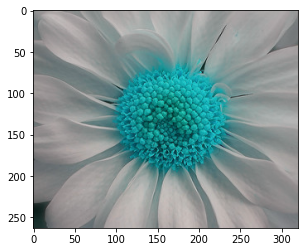

In [174]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [175]:
import numpy as np

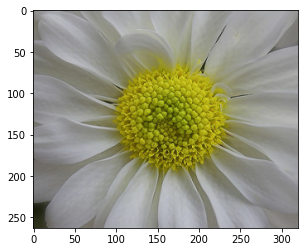

In [176]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

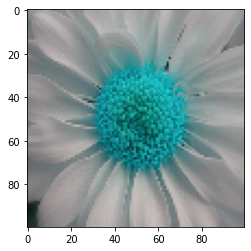

In [177]:
plt.imshow(cv2.resize(img,(100,100)))

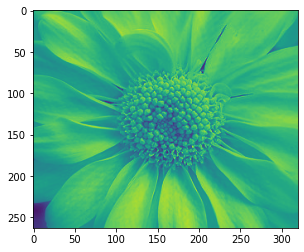

In [181]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

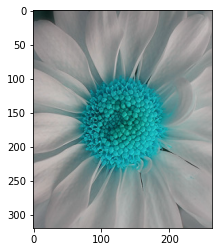

In [178]:
plt.imshow(cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE))

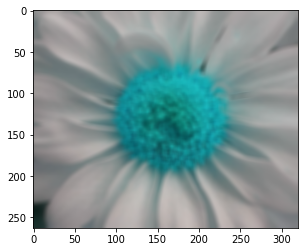

In [179]:
X = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(X)

In [180]:
rs = cv2.resize(img,(100,100))
print(img.shape)
print(rs.shape)

(263, 320, 3)
(100, 100, 3)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [137]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/assignment 3/training",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [138]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/assignment 3/testing",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 671 images belonging to 5 classes.


In [139]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

CNN

In [141]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

In [140]:
model = Sequential()

In [142]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [143]:
model.add(MaxPool2D(pool_size=(2,2)))

In [144]:
model.add(Flatten())

In [145]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [147]:
model.add(Dense(5,activation="softmax"))

In [148]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['Accuracy'])

In [150]:
len(x_train)

180

In [152]:
model.fit(x_train, epochs=10, steps_per_epoch=len(x_train))

Epoch 1/10
180/180 [==============================] - 76s 421ms/step - loss: 1.0621 - Accuracy: 0.5773
Epoch 2/10
180/180 [==============================] - 49s 271ms/step - loss: 0.9636 - Accuracy: 0.6224
Epoch 3/10
180/180 [==============================] - 50s 278ms/step - loss: 0.9176 - Accuracy: 0.6352
Epoch 4/10
180/180 [==============================] - 49s 274ms/step - loss: 0.8678 - Accuracy: 0.6641
Epoch 5/10
180/180 [==============================] - 51s 282ms/step - loss: 0.8386 - Accuracy: 0.6741
Epoch 6/10
180/180 [==============================] - 49s 270ms/step - loss: 0.8063 - Accuracy: 0.6921
Epoch 7/10
180/180 [==============================] - 48s 266ms/step - loss: 0.7784 - Accuracy: 0.7012
Epoch 8/10
180/180 [==============================] - 48s 267ms/step - loss: 0.7593 - Accuracy: 0.7056
Epoch 9/10
180/180 [==============================] - 46s 257ms/step - loss: 0.7370 - Accuracy: 0.7102
Epoch 10/10
180/180 [==============================] - 47s 261ms/step - l

In [153]:
model.save("flower.h5")

In [154]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [155]:
model=load_model('flower.h5')

In [161]:
img = image.load_img(r"/content/drive/MyDrive/assignment 3/training/sunflower/1008566138_6927679c8a.jpg")

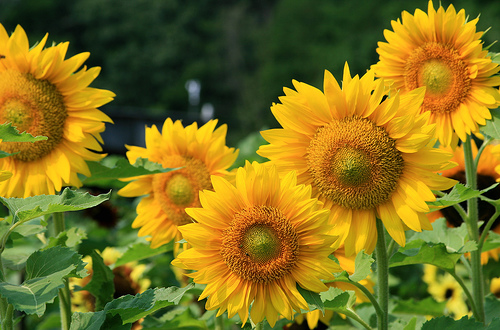

In [162]:
img

In [163]:
img = image.load_img(r"/content/drive/MyDrive/assignment 3/training/sunflower/1008566138_6927679c8a.jpg",target_size=(64,64))

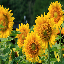

In [164]:
img

In [165]:
x = image.img_to_array(img)
x

array([[[ 30.,  50.,  38.],
        [ 29.,  50.,  35.],
        [ 22.,  42.,  30.],
        ...,
        [ 11.,  32.,  13.],
        [ 16.,  38.,  17.],
        [ 25.,  48.,  19.]],

       [[ 23.,  46.,  28.],
        [ 23.,  46.,  28.],
        [ 17.,  35.,  21.],
        ...,
        [ 23.,  50.,  19.],
        [ 28.,  58.,  24.],
        [ 29.,  61.,  20.]],

       [[ 24.,  49.,  28.],
        [ 19.,  45.,  20.],
        [ 11.,  32.,  15.],
        ...,
        [ 46.,  75.,  19.],
        [ 40.,  72.,  31.],
        [ 27.,  57.,  21.]],

       ...,

       [[ 88., 122.,  46.],
        [ 39.,  74.,  16.],
        [ 39.,  78.,  23.],
        ...,
        [ 49.,  79.,  25.],
        [ 61., 107.,  60.],
        [ 61., 114.,  72.]],

       [[ 73., 111.,  36.],
        [ 32.,  71.,   8.],
        [ 40.,  50.,  25.],
        ...,
        [ 45.,  85.,  33.],
        [ 74., 106.,  67.],
        [ 52., 103.,  47.]],

       [[ 88., 114.,  49.],
        [ 34.,  69.,  13.],
        [ 39.,  

In [166]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 30.,  50.,  38.],
         [ 29.,  50.,  35.],
         [ 22.,  42.,  30.],
         ...,
         [ 11.,  32.,  13.],
         [ 16.,  38.,  17.],
         [ 25.,  48.,  19.]],

        [[ 23.,  46.,  28.],
         [ 23.,  46.,  28.],
         [ 17.,  35.,  21.],
         ...,
         [ 23.,  50.,  19.],
         [ 28.,  58.,  24.],
         [ 29.,  61.,  20.]],

        [[ 24.,  49.,  28.],
         [ 19.,  45.,  20.],
         [ 11.,  32.,  15.],
         ...,
         [ 46.,  75.,  19.],
         [ 40.,  72.,  31.],
         [ 27.,  57.,  21.]],

        ...,

        [[ 88., 122.,  46.],
         [ 39.,  74.,  16.],
         [ 39.,  78.,  23.],
         ...,
         [ 49.,  79.,  25.],
         [ 61., 107.,  60.],
         [ 61., 114.,  72.]],

        [[ 73., 111.,  36.],
         [ 32.,  71.,   8.],
         [ 40.,  50.,  25.],
         ...,
         [ 45.,  85.,  33.],
         [ 74., 106.,  67.],
         [ 52., 103.,  47.]],

        [[ 88., 114.,  49.],
       

In [167]:
pred=model.predict(x)

In [168]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [169]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [170]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [171]:
index[np.argmax(pred)]

'sunflower'